In [103]:
import pandas as pd
import numpy as np
import function_initial as  fn
import matplotlib.pyplot as plt
%matplotlib inline

In [104]:
df = pd.read_csv('stock_data.csv',low_memory=False)

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 467495 entries, 0 to 467494
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   Date      467495 non-null  object
 1   Symbol    467495 non-null  object
 2   LTP       467495 non-null  object
 3   %Change   467495 non-null  object
 4   High      467495 non-null  object
 5   Low       467495 non-null  object
 6   Open      467495 non-null  object
 7   Quantity  467433 non-null  object
 8   Turnover  467495 non-null  object
dtypes: object(9)
memory usage: 32.1+ MB


In [106]:
df['LTP'] = df['LTP'].str.replace(',', '')  # Remove commas from the values
df['LTP'] = pd.to_numeric(df['LTP'])
df['High'] = df['High'].str.replace(',', '')  # Remove commas from the values
df['High'] = pd.to_numeric(df['High'])
df['Low'] = df['Low'].str.replace(',', '')  # Remove commas from the values
df['Low'] = pd.to_numeric(df['Low'])
df['Open'] = df['Open'].str.replace(',', '')  # Remove commas from the values
df['Open'] = pd.to_numeric(df['Open'])
df['Turnover'] = df['Turnover'].str.replace(',', '')  # Remove commas from the values
df['Turnover'] = pd.to_numeric(df['Turnover'])
df['Quantity'] = df['Quantity'].str.replace(',', '')  # Remove commas from the values
df['Quantity'] = pd.to_numeric(df['Quantity'])

In [107]:
df

,Date,Symbol,LTP,%Change,High,Low,Open,Quantity,Turnover
0,2000/1/10,EBL,546.0,1.11,546.0,545.0,540.0,220.0,119980.0
1,2000/1/10,EIC,251.0,2.45,260.0,250.0,245.0,70.0,17710.0
2,2000/1/10,HBL,1500.0,1.01,1500.0,1475.0,1485.0,370.0,554000.0
3,2000/1/10,HBT,3.0,0.0,3.0,3.0,3.0,5380.0,16140.0
4,2000/1/10,JSM,340.0,-5.56,340.0,340.0,360.0,181.0,61540.0
...,...,...,...,...,...,...,...,...,...
467490,2023/3/9,UPPER,475.0,2.13,479.0,468.0,474.4,51117.0,24214216.7
467491,2023/3/9,USHEC,363.0,4.31,366.0,350.1,350.1,4624.0,1659571.0
467492,2023/3/9,USLB,775.0,2.3,790.0,755.0,755.0,274.0,212271.5
467493,2023/3/9,VLBS,786.0,1.68,786.0,766.0,766.0,271.0,211889.0


In [108]:
df['Average']= pd.Series(df['Turnover']/df['Quantity'])

In [109]:
df = fn.initialization(df,'ADBL','2021-01-01','2023-03-29')



In [110]:
fn.plotly_plot_line(df,'Date','LTP','ADBL')

In [111]:
df= df[['Average']]

In [112]:
df.reset_index(inplace=True)


In [113]:
df.drop('index' ,axis=1,inplace=True)

In [114]:
df

,Average
0,436.724420
1,439.016349
2,436.530543
3,435.504045
4,435.925007
...,...
529,258.034362
530,254.258564
531,248.551670
532,243.799013


In [115]:

from pmdarima.arima.utils import ndiffs

ndiffs (df['Average'], test="adf")

1

In [116]:
diff1= df.LTP.diff().dropna()

AttributeError: 'DataFrame' object has no attribute 'LTP'

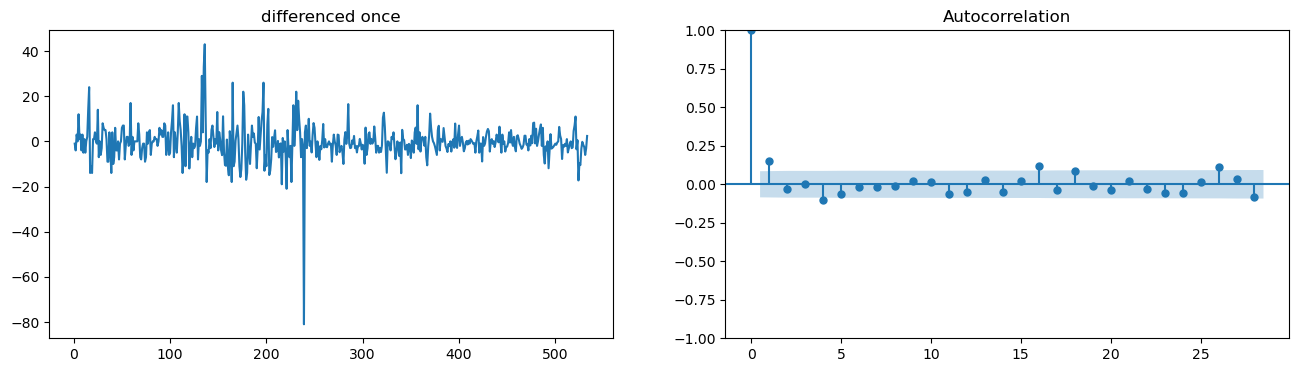

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(diff1)
ax1.set_title('differenced once')

plot_acf(diff1, ax=ax2)

plt.show()

In [ ]:
#train_test_split
n = int(len(df) *0.9)
train = df.Average[:n]
test = df.Average[n:]

In [ ]:
import pmdarima as pm

# Assuming you have a time series dataset in a pandas DataFrame called 'data'
# 'data' should have a single column representing the time series values

# Split the data into training and test sets

# Create and fit the Auto ARIMA model
model = pm.auto_arima(train, seasonal=True, m= 12,trace=True)

# Print the selected ARIMA model order
print("ARIMA Model Order:", model.order)

# Generate forecasts for the test set
forecast, conf_int = model.predict(n_periods=len(test), return_conf_int=True)

# Create a DataFrame with the forecasted values and confidence intervals
forecast_df = pd.DataFrame({'Forecast': forecast, 'Lower_CI': conf_int[:, 0], 'Upper_CI': conf_int[:, 1]}, index=test.index)

# Print the forecast DataFrame
print(forecast_df)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=3350.589, Time=1.07 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=3355.097, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=3348.256, Time=0.26 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=3346.740, Time=0.25 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=3353.548, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=3345.910, Time=0.12 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=3346.867, Time=0.26 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=3348.424, Time=0.53 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=3345.218, Time=0.20 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=3346.204, Time=0.53 sec
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=3346.084, Time=0.51 sec
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=3347.798, Time=0.64 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=3347.259, Time=0.09 sec
 ARIMA(2,1,1)(0,0,0)[12] intercept   : AIC=3347.118, Time=0.24 sec
 ARIMA(1,1,2)(0,0,0

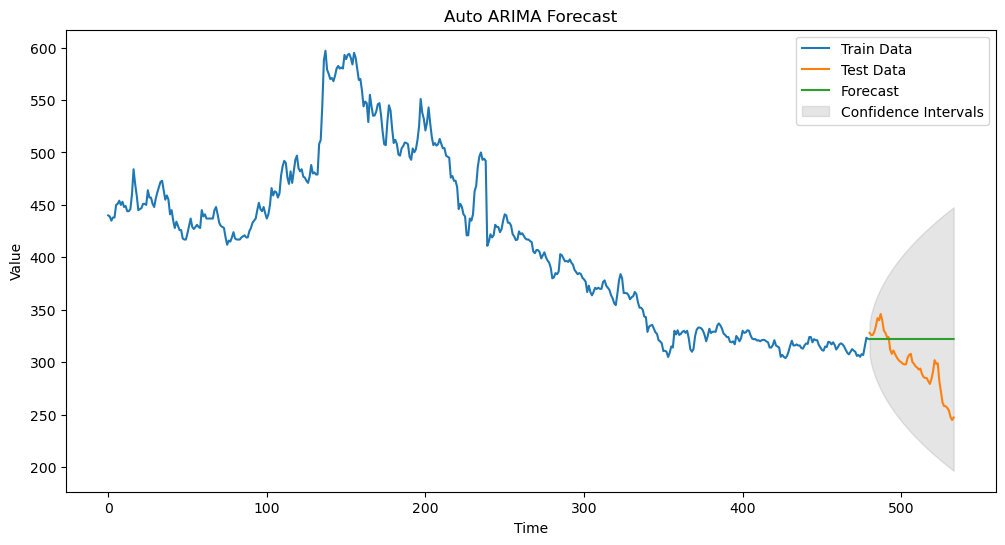

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(train, label='Train Data')
plt.plot(test, label='Test Data')
plt.plot(forecast_df['Forecast'], label='Forecast')
plt.fill_between(forecast_df.index, forecast_df['Lower_CI'], forecast_df['Upper_CI'], color='gray', alpha=0.2, label='Confidence Intervals')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Auto ARIMA Forecast')
plt.legend()
plt.show()

In [ ]:
import statsmodels.api as sm

# Assuming you have a time series dataset in a pandas DataFrame called 'data'
# 'data' should have a single column representing the time series values

# Split the data into training and test sets

# Fit a SARIMAX model with seasonality
model = sm.tsa.SARIMAX(train, order=(2, 1, 2), seasonal_order=(2 ,1, 2, 50))

# Fit the model to the training data
fitted_model = model.fit()

# Generate forecasts for the test set
forecast = fitted_model.predict(start=len(train), end=len(train) + len(test) - 1)

# Print the forecast values
print(forecast)

c:\ProgramData\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



480    321.675491
481    325.454212
482    326.530222
483    331.379980
484    333.123456
485    338.332889
486    341.604754
487    342.261115
488    337.535856
489    325.768988
490    323.337239
491    324.098512
492    323.813893
493    325.059346
494    326.343919
495    326.874879
496    327.477016
497    327.489603
498    325.713674
499    326.541759
500    325.335949
501    327.018763
502    328.293363
503    327.409106
504    324.738525
505    325.979543
506    325.310647
507    325.430949
508    323.572059
509    328.705434
510    326.054236
511    325.147987
512    325.325693
513    323.118488
514    319.596438
515    324.425018
516    321.134684
517    318.527417
518    317.181207
519    316.069544
520    316.308413
521    315.091528
522    315.383054
523    312.461334
524    308.168678
525    307.321612
526    306.580259
527    308.479630
528    311.442389
529    309.071705
530    307.144696
531    310.787827
532    311.785413
533    315.479516
Name: predicted_mean, dtype:

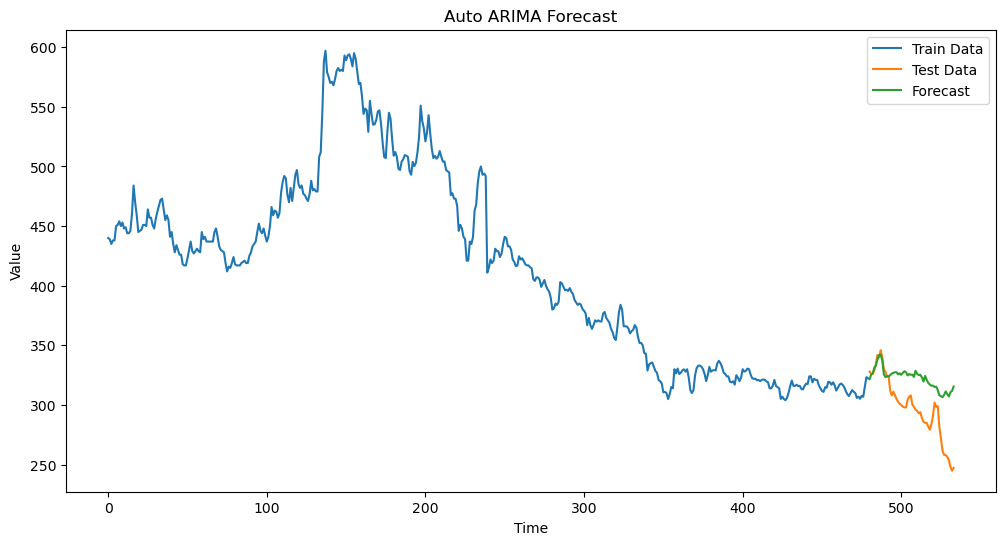

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(train, label='Train Data')
plt.plot(test, label='Test Data')
plt.plot(forecast, label='Forecast')
#plt.fill_between(forecast.index, forecast['Lower_CI'], forecast['Upper_CI'], color='gray', alpha=0.2, label='Confidence Intervals')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Auto ARIMA Forecast')
plt.legend()
plt.show()

In [ ]:
#

# Assuming you have a time series dataset in a pandas DataFrame called 'data'
# 'data' should have a single column representing the time series values

# Split the data into training and test sets

# Fit a SARIMAX model with seasonality in the model order
model = sm.tsa.SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 30))

# Fit the model to the training data
fitted_model = model.fit()

# Generate forecasts for the test set
forecast = fitted_model.predict(start=len(train), end=len(train) + len(test) - 1)

# Print the forecast values
print(forecast)


480    320.726393
481    321.493663
482    320.655256
483    319.451604
484    318.919384
485    319.954148
486    317.365735
487    316.990136
488    315.848643
489    314.570751
490    312.538357
491    310.563801
492    311.810808
493    314.494430
494    311.584379
495    315.521653
496    317.718314
497    315.828928
498    314.750926
499    315.527019
500    314.925936
501    318.456153
502    320.075161
503    318.132394
504    316.750439
505    318.101022
506    317.481254
507    319.780292
508    318.469625
509    314.429856
510    312.752396
511    313.491012
512    312.738239
513    311.546247
514    311.110650
515    312.118567
516    309.540452
517    309.206210
518    308.041064
519    306.708787
520    304.750115
521    302.856979
522    304.099684
523    306.719144
524    303.824945
525    307.636160
526    309.747531
527    307.864927
528    306.849247
529    307.655367
530    307.040369
531    310.489936
532    312.011072
533    310.119562
Name: predicted_mean, dtype:

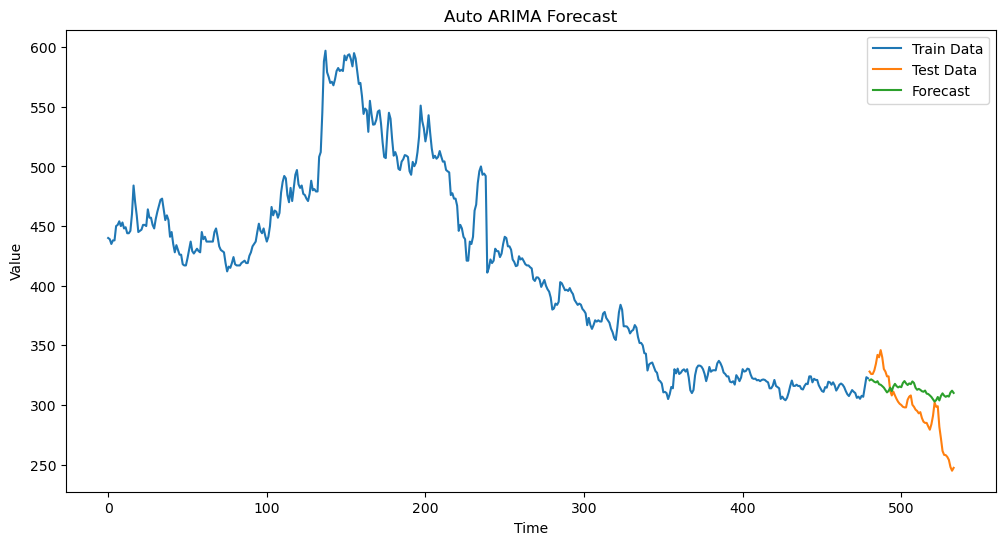

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(train, label='Train Data')
plt.plot(test, label='Test Data')
plt.plot(forecast, label='Forecast')
#plt.fill_between(forecast.index, forecast['Lower_CI'], forecast['Upper_CI'], color='gray', alpha=0.2, label='Confidence Intervals')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Auto ARIMA Forecast')
plt.legend()
plt.show()